<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Read-Data" data-toc-modified-id="Read-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read Data</a></span><ul class="toc-item"><li><span><a href="#Climatology" data-toc-modified-id="Climatology-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Climatology</a></span></li><li><span><a href="#Seasonal-Cycle-Reproducibility" data-toc-modified-id="Seasonal-Cycle-Reproducibility-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Seasonal Cycle Reproducibility</a></span></li><li><span><a href="#Biome-mean-PDF" data-toc-modified-id="Biome-mean-PDF-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Biome-mean PDF</a></span></li><li><span><a href="#Biome-mean-Timeseries" data-toc-modified-id="Biome-mean-Timeseries-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Biome-mean Timeseries</a></span></li></ul></li><li><span><a href="#Plot-Seasonal-Cycle-Reproducibility-comparison" data-toc-modified-id="Plot-Seasonal-Cycle-Reproducibility-comparison-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plot Seasonal Cycle Reproducibility comparison</a></span><ul class="toc-item"><li><span><a href="#Make-colorbar-and-define-colormaps" data-toc-modified-id="Make-colorbar-and-define-colormaps-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Make colorbar and define colormaps</a></span></li><li><span><a href="#Regrid-for-differencing" data-toc-modified-id="Regrid-for-differencing-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Regrid for differencing</a></span></li><li><span><a href="#Plot-SCR-comparison" data-toc-modified-id="Plot-SCR-comparison-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Plot SCR comparison</a></span></li></ul></li><li><span><a href="#Plot-pCO2-Summer-vs-winter-difference" data-toc-modified-id="Plot-pCO2-Summer-vs-winter-difference-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plot pCO2 Summer vs winter difference</a></span></li><li><span><a href="#Calc-correlation-of-climatology" data-toc-modified-id="Calc-correlation-of-climatology-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Calc correlation of climatology</a></span><ul class="toc-item"><li><span><a href="#Plot-TS" data-toc-modified-id="Plot-TS-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Plot TS</a></span></li></ul></li></ul></div>

# Plot pCO2 maps and biome stats

In [1]:
import sys
import os
src_path = os.path.abspath(os.path.join(os.getcwd(), '../src'))
sys.path.append(src_path)
import bp12_tools as bp12
import bp12_tools.plot_utils as pu

import pandas as pd
import numpy as np
import xarray as xr
import xesmf as xe
from scipy.stats import pearsonr

from cartopy import crs as ccrs, feature as cfeature
from cmcrameri import cm
import cmocean.cm as cmo
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

---

## Read Data

### Climatology

In [2]:
pco2_clim_mdl = xr.open_dataset(f"../data/CO2/BIOPERIANT12_pCO2_clim_monthly.nc")
pco2_clim_mdl = pco2_clim_mdl.pco2.sel(lat=slice(-77,-30))

In [3]:
pco2_clim_obs = xr.open_dataset(f"../data/CO2/OBS_pCO2_clim_monthly.nc")
pco2_clim_obs = pco2_clim_obs.pco2.sel(lat=slice(-77,-30))

### Seasonal Cycle Reproducibility

In [4]:
pco2_scr_mdl = xr.open_dataset(f"../data/CO2/BIOPERIANT12_pCO2_SCR_2000-2009.nc")
pco2_scr_mdl = pco2_scr_mdl.SCR.sel(lat=slice(-77,-30))
pco2_scr_obs = xr.open_dataset(f"../data/CO2/OBS_pCO2_SCR_2000-2009.nc")
pco2_scr_obs = pco2_scr_obs.SCR.sel(lat=slice(-77,-30))

### Biome-mean PDF

In [13]:
pco2_bpdf_mdl = xr.open_dataset(f'../data/CO2/BIOPERIANT12_pCO2_PDF_meanbiome_clim.nc')
pco2_bpdf_obs = xr.open_dataset(f'../data/CO2/OBS_pCO2_PDF_biomes_clim.nc')

### Biome-mean Timeseries

In [2]:
pco2_bts_mdl = xr.open_dataset(f"../data/TIMESERIES/BIOPERIANT12_timeseries_biome_pco2_IA.nc")
pco2_bts_obs = xr.open_dataset(f"../data/TIMESERIES/OBS_timeseries_biome_pco2_IA.nc")

## Plot Seasonal Cycle Reproducibility comparison

### Make colorbar and define colormaps

In [3]:
pco2_cbar = pu.formatting.get_label_mplstr('pco2')
mostr = pu.formatting.get_mo_titles("JFM")

In [11]:
# pCO2 colorbar
cmapP=plt.cm.RdYlBu_r
bounds = np.arange(300,410,10)
normP = mpl.colors.BoundaryNorm(bounds, cmapP.N, extend='both')

# Difference colorbar
cmapD = cmo.tools.crop_by_percent(mpl.cm.RdBu_r, 1, which='both', N=None) 
bounds = np.arange(-2,2.1,0.1)
normD = mpl.colors.BoundaryNorm(bounds, cmapD.N, extend='both')

cmap_scr = cmo.tools.crop_by_percent(cm.romaO_r,15, N=None) 
bounds = np.arange(0,1.1,0.1)
norm_scr = mpl.colors.BoundaryNorm(bounds, cmap_scr.N)

In [12]:
cmap_diff = cmo.tools.lighten(plt.cm.RdBu_r, 0.8)
bounds = np.arange(-1.,1.1,0.1)
norm_diff = mpl.colors.BoundaryNorm(bounds, cmap_diff.N, extend='both')

### Regrid for differencing

In [13]:
regridder = xe.Regridder(pco2_scr_mdl, pco2_scr_obs, 'bilinear')
pco2_scr_rgmdl = regridder(pco2_scr_mdl)

### Plot SCR comparison

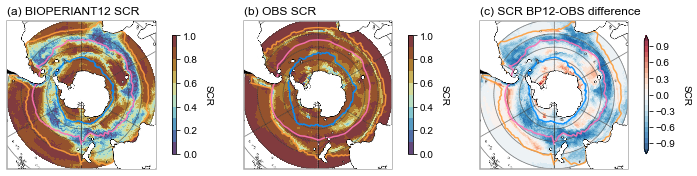

In [15]:
fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(2, 3, 1, projection = ccrs.Stereographic(central_latitude=-90))
plt.title('(a) BIOPERIANT12 SCR',loc='left',fontsize=12)
mesh = ax.pcolormesh(pco2_scr_mdl.lon, pco2_scr_mdl.lat, pco2_scr_mdl, 
                     cmap=cmap_scr, norm=norm_scr,
                     transform=ccrs.PlateCarree(), zorder=0)
cb = plt.colorbar(mesh, shrink=0.8, aspect = 25, pad = 0.08)
cb.set_label("SCR", rotation=-90, labelpad=15)
pu.maps.map_decorator(ax)
pu.maps.add_biomes(ax, dataset="mdl")


ax2 = fig.add_subplot(2, 3, 2, projection = ccrs.Stereographic(central_latitude=-90))
plt.title('(b) OBS SCR',loc='left',fontsize=12)
mesh = ax2.pcolormesh(pco2_scr_obs.lon, pco2_scr_obs.lat, pco2_scr_obs, 
                     cmap=cmap_scr, norm=norm_scr,
                     transform=ccrs.PlateCarree(), zorder=0)
cb = plt.colorbar(mesh, shrink=0.8, aspect = 25, pad = 0.08)
cb.set_label("SCR", rotation=-90, labelpad=15)
pu.maps.map_decorator(ax2)
pu.maps.add_biomes(ax2, dataset="obs")


ax3 = fig.add_subplot(2, 3, 3, projection = ccrs.Stereographic(central_latitude=-90))
plt.title('(c) SCR BP12-OBS difference',loc='left',fontsize=12)
mesh = ax3.pcolormesh(pco2_scr_obs.lon, pco2_scr_obs.lat,pco2_scr_rgmdl-pco2_scr_obs, 
                     cmap=cmap_diff, norm=norm_diff,
                     transform=ccrs.PlateCarree(), zorder=0)
cb = plt.colorbar(mesh, shrink=0.8, aspect = 25, pad = 0.08)
cb.set_label("SCR", rotation=-90, labelpad=15)
pu.maps.map_decorator(ax3)
pu.maps.add_biomes(ax3, dataset="mdl")
plt.tight_layout()

plt.savefig(f'../figures/f08.png', bbox_inches='tight')

## Plot pCO2 Summer vs winter difference

In [16]:
pco2_jan_mdl = pco2_clim_mdl.isel(time=0)
pco2_sep_mdl = pco2_clim_mdl.isel(time=8)
pco2_jan_obs = pco2_clim_obs.isel(time=0)
pco2_sep_obs = pco2_clim_obs.isel(time=8)
regridder2 = xe.Regridder(pco2_jan_mdl, pco2_jan_obs, 'bilinear')

In [17]:
pco2_jan_rgmdl = regridder2(pco2_jan_mdl)
pco2_sep_rgmdl = regridder2(pco2_sep_mdl)

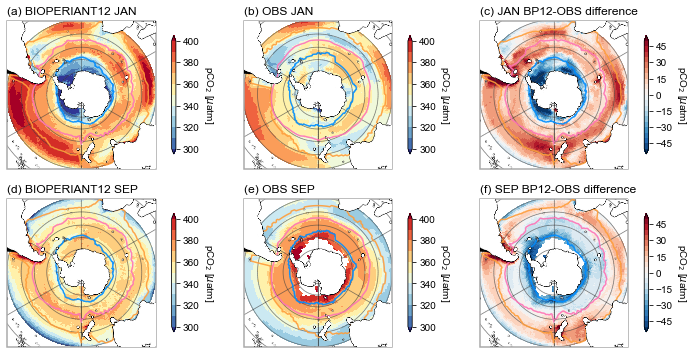

In [18]:
cmapD = cmo.tools.crop_by_percent(mpl.cm.RdBu_r, 1, which='both', N=None) 
bounds = np.arange(-50,55,5)
normD = mpl.colors.BoundaryNorm(bounds, cmapD.N, extend='both')

fig = plt.figure(figsize=(12, 6))

### ---------MODEL-----JAN---SEP---SCR------------------------------------------- ###
ax = fig.add_subplot(2, 3, 1, projection = ccrs.Stereographic(central_latitude=-90))
plt.title('(a) BIOPERIANT12 JAN',loc='left',fontsize=12)
mesh = ax.pcolormesh(pco2_clim_mdl.lon, pco2_clim_mdl.lat, pco2_jan_mdl, 
                     cmap=cmapP, norm=normP,
                     transform=ccrs.PlateCarree(), zorder=0)
cb = plt.colorbar(mesh, shrink=0.8, aspect = 25, pad = 0.08, extend='both')
cb.set_label(pco2_cbar, rotation=-90, labelpad=15)
pu.maps.map_decorator(ax)
pu.maps.add_biomes(ax, dataset="mdl")

ax2 = fig.add_subplot(2, 3, 2, projection = ccrs.Stereographic(central_latitude=-90))
plt.title('(b) OBS JAN',loc='left',fontsize=12)
mesh = ax2.pcolormesh(pco2_clim_obs.lon, pco2_clim_obs.lat, pco2_jan_obs, 
                     cmap=cmapP, norm=normP,
                     transform=ccrs.PlateCarree(), zorder=0)
cb = plt.colorbar(mesh, shrink=0.8, aspect = 25, pad = 0.08, extend='both')
cb.set_label(pco2_cbar, rotation=-90, labelpad=15)
pu.maps.map_decorator(ax2)
pu.maps.add_biomes(ax2, dataset="obs")        

ax3 = fig.add_subplot(2, 3, 3, projection = ccrs.Stereographic(central_latitude=-90))
plt.title('(c) JAN BP12-OBS difference',loc='left',fontsize=12)
mesh = ax3.pcolormesh(pco2_clim_obs.lon, pco2_clim_obs.lat, pco2_jan_rgmdl-pco2_jan_obs,
                     cmap=cmapD, norm=normD, 
                     transform=ccrs.PlateCarree(), zorder=0)
cb = plt.colorbar(mesh, shrink=0.8, aspect = 25, pad = 0.08)
cb.set_label(pco2_cbar, rotation=-90, labelpad=15)
pu.maps.map_decorator(ax3)
pu.maps.add_biomes(ax3, dataset="mdl")

### ---------OBS-----JAN---SEP---SCR------------------------------------------- ###
ax4 = fig.add_subplot(2, 3, 4, projection = ccrs.Stereographic(central_latitude=-90))
plt.title('(d) BIOPERIANT12 SEP',loc='left',fontsize=12)
mesh = ax4.pcolormesh(pco2_clim_mdl.lon, pco2_clim_mdl.lat, pco2_sep_mdl, 
                     cmap=cmapP, norm=normP,
                     transform=ccrs.PlateCarree(), zorder=0)
cb = plt.colorbar(mesh, shrink=0.8, aspect = 25, pad = 0.08, extend='both')
cb.set_label(pco2_cbar, rotation=-90, labelpad=15)
pu.maps.map_decorator(ax4)
pu.maps.add_biomes(ax4, dataset="mdl")

ax5 = fig.add_subplot(2, 3, 5, projection = ccrs.Stereographic(central_latitude=-90))
plt.title('(e) OBS SEP',loc='left',fontsize=12)
mesh = ax5.pcolormesh(pco2_clim_obs.lon, pco2_clim_obs.lat, pco2_sep_obs, 
                     cmap=cmapP, norm=normP,
                     transform=ccrs.PlateCarree(), zorder=0)
cb = plt.colorbar(mesh, shrink=0.8, aspect = 25, pad = 0.08, extend='both')
cb.set_label(pco2_cbar, rotation=-90, labelpad=15)
pu.maps.map_decorator(ax5)
pu.maps.add_biomes(ax5, dataset="obs")


ax6 = fig.add_subplot(2, 3, 6, projection = ccrs.Stereographic(central_latitude=-90))
plt.title('(f) SEP BP12-OBS difference',loc='left',fontsize=12)
mesh = ax6.pcolormesh(pco2_clim_obs.lon, pco2_clim_obs.lat, pco2_sep_rgmdl-pco2_sep_obs,
                     cmap=cmapD, norm=normD,
                     transform=ccrs.PlateCarree(), zorder=0)
cb = plt.colorbar(mesh, shrink=0.8, aspect = 25, pad = 0.08)
cb.set_label(pco2_cbar, rotation=-90, labelpad=15)
pu.maps.map_decorator(ax6)
pu.maps.add_biomes(ax6, dataset="mdl")
plt.tight_layout()
plt.savefig(f'../figures/CO2_Fig1a', bbox_inches='tight', dpi=400)

# PLOT TIMESERIES 

In [4]:
# biome colours
color17 = pu.formatting.get_biome_colors(17)
color16 = pu.formatting.get_biome_colors(16)
color15 = pu.formatting.get_biome_colors(15) 

In [12]:
def plot_pdf(axin, mdlin, obsin, clrin):
    axin.plot(mdlin[0], mdlin[1], c=clrin, lw=2)
    axin.plot(obsin[0], obsin[1], c=clrin, lw=2, linestyle='--') 
    axin.set_xlim(320,400)
    axin.set_xticks(np.arange(320,420,20))
    axin.set_ylim(0, 0.2)
    axin.set_xlabel(pco2_cbar, labelpad=5, fontsize=12)
    axin.set_ylabel("PDF", labelpad=5, fontsize=12)
    axin.grid(lw=1, c='0.75', alpha=0.4)
    axin.set_rasterized(True)  

## Calc correlation of climatology

In [5]:
r15 = pearsonr(pco2_bts_mdl.pco215_mean.resample(time='1MS').mean().values, pco2_bts_obs.pco215_mean.values)
r16 = pearsonr(pco2_bts_mdl.pco216_mean.resample(time='1MS').mean().values, pco2_bts_obs.pco216_mean.values)
r17 = pearsonr(pco2_bts_mdl.pco217_mean.resample(time='1MS').mean().values, pco2_bts_obs.pco217_mean.values)

### Plot TS

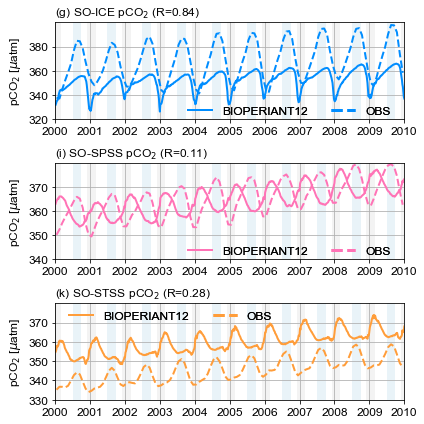

In [17]:
fig = plt.figure(figsize=(6,6))

ax1 = fig.add_subplot(311)
pu.timeseries.plot_ts_mdlvsobs(ax1, pco2_bts_mdl.pco217_mean, pco2_bts_obs.pco217_mean, \
                 (320, 400, 20), [color17, color17], pco2_cbar, [0,1])
pu.timeseries.add_omlegend(ax1, (0.35, -0.08), color17)
plt.title(f'(g) SO-ICE pCO$_2$ (R={r17[0]:.2f})',loc='left',fontsize=12)


ax2 = fig.add_subplot(312)
pu.timeseries.plot_ts_mdlvsobs(ax2, pco2_bts_mdl.pco216_mean, pco2_bts_obs.pco216_mean, \
                (340,380,10), [color16, color16], pco2_cbar, [0,1])
pu.timeseries.add_omlegend(ax2, (0.35, -0.08), color16)
plt.title(f'(i) SO-SPSS pCO$_2$ (R={r16[0]:.2f})',loc='left',fontsize=12)

ax3 = fig.add_subplot(313)
pu.timeseries.plot_ts_mdlvsobs(ax3, pco2_bts_mdl.pco215_mean, pco2_bts_obs.pco215_mean, \
                (330,380,10), [color15, color15], pco2_cbar, [0,1])
pu.timeseries.add_omlegend(ax3, (0.01, 0.7), color15)
plt.title(f'(k) SO-STSS pCO$_2$ (R={r15[0]:.2f})',loc='left',fontsize=12)
plt.tight_layout()
plt.savefig(f'../figures/CO2_Fig1c', bbox_inches='tight')

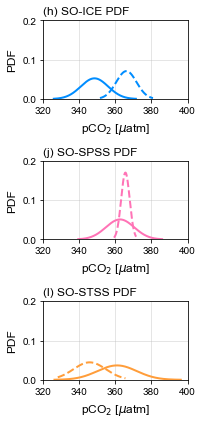

In [18]:
fig = plt.figure(figsize=(3,6))
ax1b = fig.add_subplot(311)
plot_pdf(ax1b, (pco2_bpdf_mdl.val17.sel(month=13), pco2_bpdf_mdl.pdf17.sel(month=13)),
         (pco2_bpdf_obs.val17.sel(month=13), pco2_bpdf_obs.pdf17.sel(month=13)), 
         color17)

plt.title(f'(h) SO-ICE PDF',loc='left',fontsize=12)
ax2b = fig.add_subplot(312)
plot_pdf(ax2b, (pco2_bpdf_mdl.val16.sel(month=13), pco2_bpdf_mdl.pdf16.sel(month=13)),
         (pco2_bpdf_obs.val16.sel(month=13), pco2_bpdf_obs.pdf16.sel(month=13)), 
         color16)
plt.title(f'(j) SO-SPSS PDF',loc='left',fontsize=12)
ax3b = fig.add_subplot(313)
plot_pdf(ax3b, (pco2_bpdf_mdl.val15.sel(month=13), pco2_bpdf_mdl.pdf15.sel(month=13)),
         (pco2_bpdf_obs.val15.sel(month=13), pco2_bpdf_obs.pdf15.sel(month=13)), 
         color15)
plt.title(f'(l) SO-STSS PDF',loc='left',fontsize=12)
plt.tight_layout()
plt.savefig(f'../figures/CO2_Fig1d', bbox_inches='tight', dpi=300)

# Combine Images

In [19]:
from PIL import Image

In [20]:
im1 = Image.open(f'../figures/CO2_Fig1a.png')
im3 = Image.open(f'../figures/CO2_Fig1c.png')
im4 = Image.open(f'../figures/CO2_Fig1d.png')
im_final  = Image.new('RGB', (im1.width, im1.height+im3.height), (255, 255, 255))
im_final.paste(im1,(0, 0))
offset = int((im1.width-im3.width-im4.width)/3)
im_final.paste(im3, (offset, im1.height))
im_final.paste(im4, (im3.width+offset, im1.height))
im_final.show()
im_final.save(f'../figures/f09.png', bbox_inches='tight')